In [384]:
import matplotlib.pyplot as plt
from matplotlib.axes import Axes as plt_Axes
from matplotlib.markers import MarkerStyle as plt_Marker
from matplotlib.patches import Rectangle as plt_Rectangle
import skimage as ski
import numpy as np
from typing import cast, TypeVar, Any
import scipy as sp
import random
import sklearn.cluster
plt.ioff()


def rgb2gray(img: np.ndarray) -> np.ndarray[Any, np.uint8]:
    return np.uint8(np.round(ski.color.rgb2gray(img) * 255))

## Zadanie 1

### Krok 1
Wczytaj obraz rtg **brain_tumor** i poprzez wybór jednej z automatycznych metod
progowania uwidocznij cały mózg.

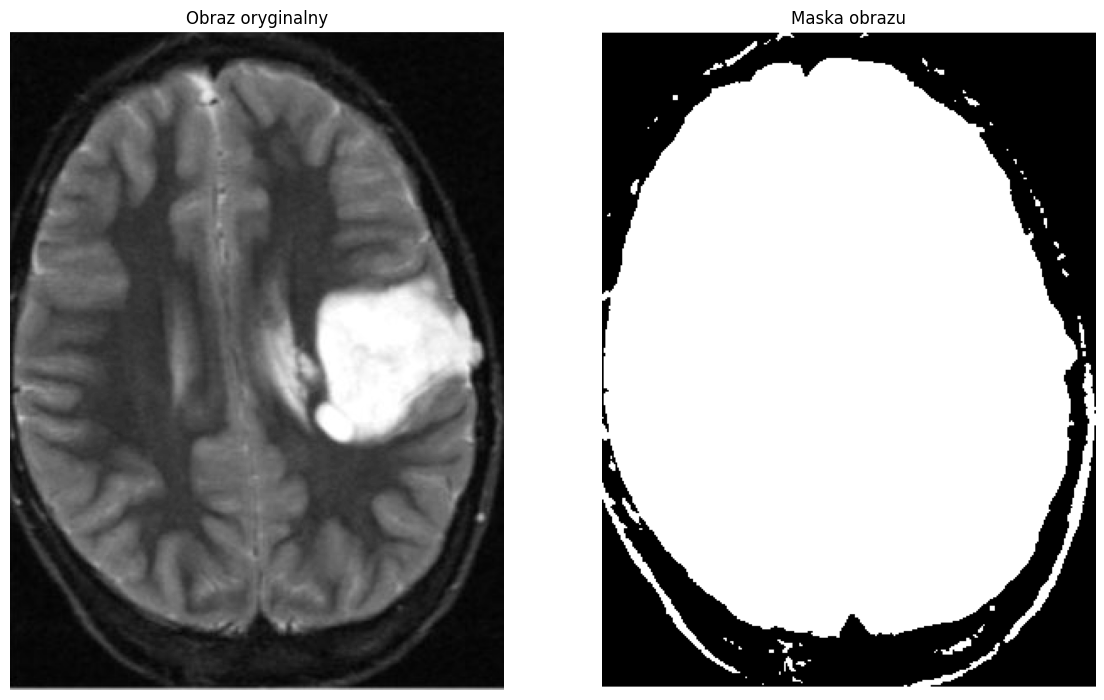

In [385]:
brain_tumor = ski.io.imread("lab4/brain_tumor.png")
brain_tumor = rgb2gray(brain_tumor)

# fig, axs = ski.filters.try_all_threshold(brain_tumor, figsize=(16, 10), verbose=False)
# fig.suptitle("Test metod próbkowania")
# plt.show()

th_Triangle = ski.filters.threshold_minimum(brain_tumor)
brain_tumor_Min = brain_tumor > th_Triangle
brain_tumor_Min = sp.ndimage.binary_fill_holes(brain_tumor_Min)

_, axs = plt.subplots(1, 2, figsize=(14, 10))

cast(plt_Axes, axs[0]).imshow(brain_tumor, cmap="gray")
cast(plt_Axes, axs[0]).set_title("Obraz oryginalny")
cast(plt_Axes, axs[0]).axis(False)

cast(plt_Axes, axs[1]).imshow(brain_tumor_Min, cmap="gray")
cast(plt_Axes, axs[1]).set_title("Maska obrazu")
cast(plt_Axes, axs[1]).axis(False)

plt.show()

### Krok 2
Korzystając  z modułu

`skimage.measure`

wykorzystaj metodę label, aby dokonać segmentacji obrazu binarnego. Policz, ile
jest segmentów. Zaprezentuj obraz wykorzystując dowolną mapę kolorów

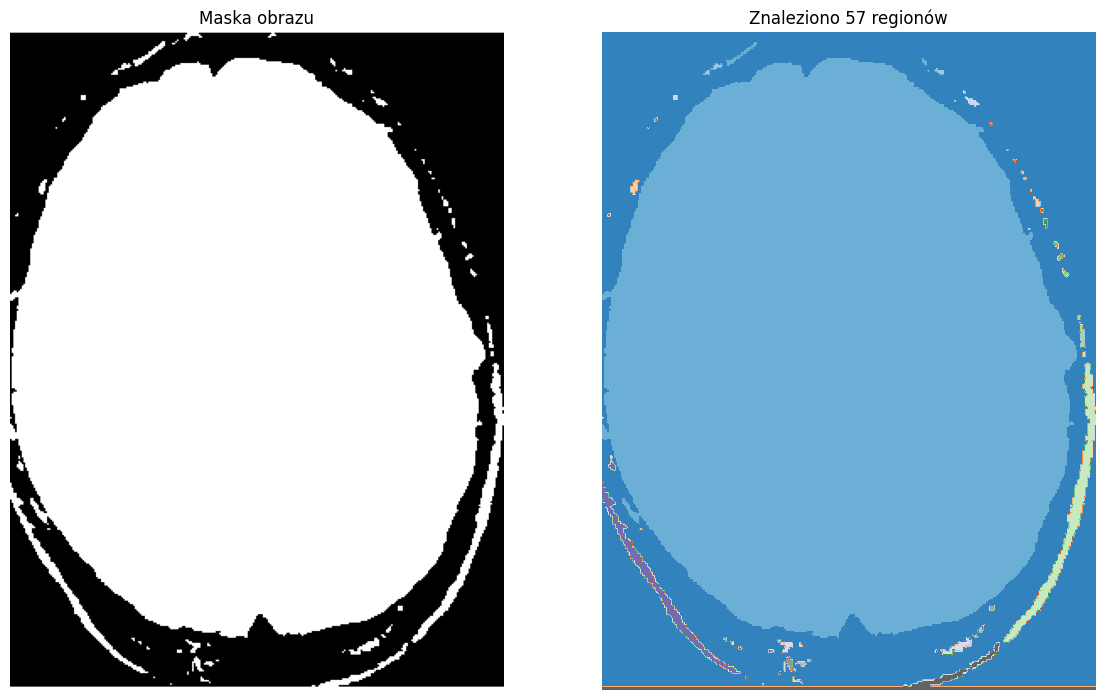

In [386]:
labelz_brain, label_cnt = ski.measure.label(brain_tumor_Min, return_num=True)

_, axs = plt.subplots(1, 2, figsize=(14, 10))

cast(plt_Axes, axs[0]).imshow(brain_tumor_Min, cmap="gray")
cast(plt_Axes, axs[0]).set_title("Maska obrazu")
cast(plt_Axes, axs[0]).axis(False)

cast(plt_Axes, axs[1]).imshow(labelz_brain, cmap="tab20c")
cast(plt_Axes, axs[1]).set_title(f"Znaleziono {label_cnt} regionów")
cast(plt_Axes, axs[1]).axis(False)

plt.show()

### Krok 3
Używając dla posegmentowanego obrazu metodę

`skimage.measure.regionprops`

uzyskasz listę obiektów zawierających statystyki obliczone dla poszczególnych
segmentów. Teraz interesuje nas pole powierzchni. Wybierz segment, dla którego
pole powierzchni jest maksymalne i zaprezentuj jego obraz. Podaj to pole
opowierzchni. Usuń z obrazu pozostałe obiekty.

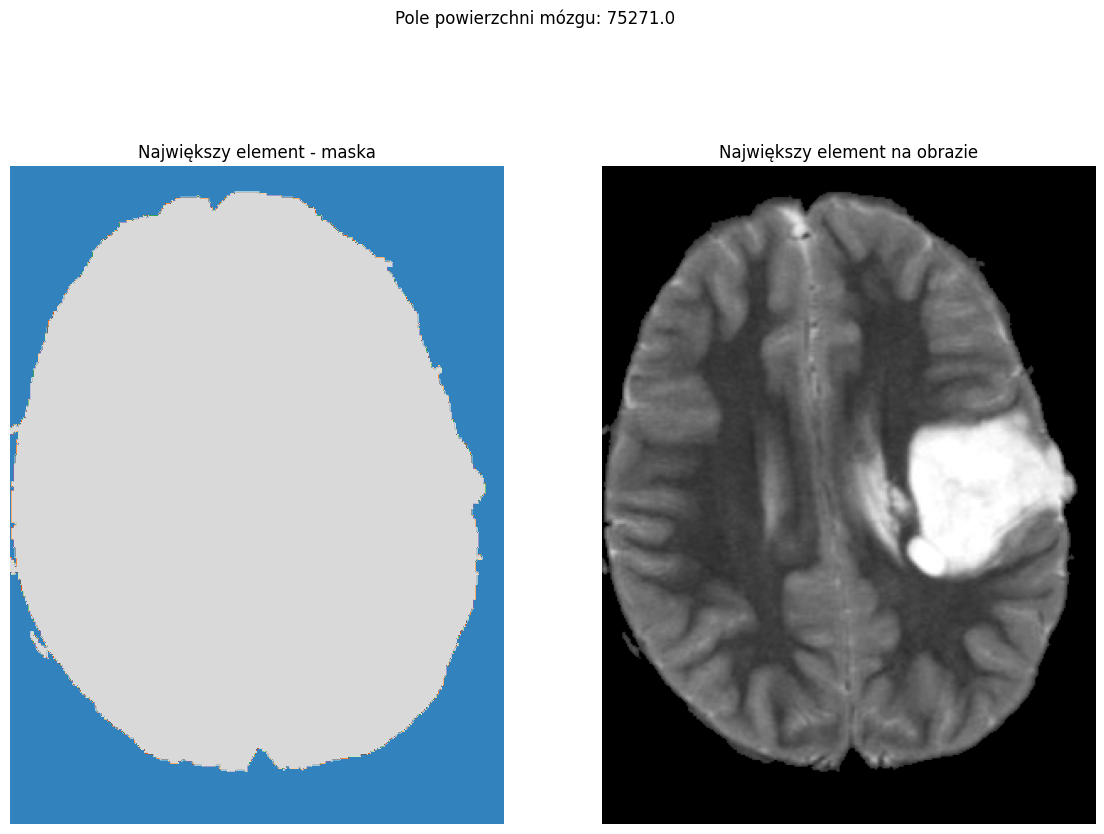

In [387]:
propz_brain = ski.measure.regionprops(labelz_brain)

max_br = max(propz_brain, key=lambda a: a.area)
max_i_br = max_br.label
max_area_br = max_br.area

brain_mask = ( labelz_brain == max_i_br )
brain_only = np.zeros_like(brain_tumor, dtype=np.uint8)
brain_only[brain_mask] = brain_tumor[brain_mask]


fig, axs = plt.subplots(1, 2, figsize=(14, 10))
fig.suptitle(f"Pole powierzchni mózgu: {max_area_br}")

cast(plt_Axes, axs[0]).imshow(brain_mask, cmap="tab20c")
cast(plt_Axes, axs[0]).set_title("Największy element - maska")
cast(plt_Axes, axs[0]).axis(False)

cast(plt_Axes, axs[1]).imshow(brain_only, cmap="gray")
cast(plt_Axes, axs[1]).set_title("Największy element na obrazie")
cast(plt_Axes, axs[1]).axis(False)

plt.show()

### Krok 4
Dla obrazu wejściowego ustaw teraz inny próg tak, aby uwidocznić sam guz
i przeprowadź ten sam ciąg operacji.

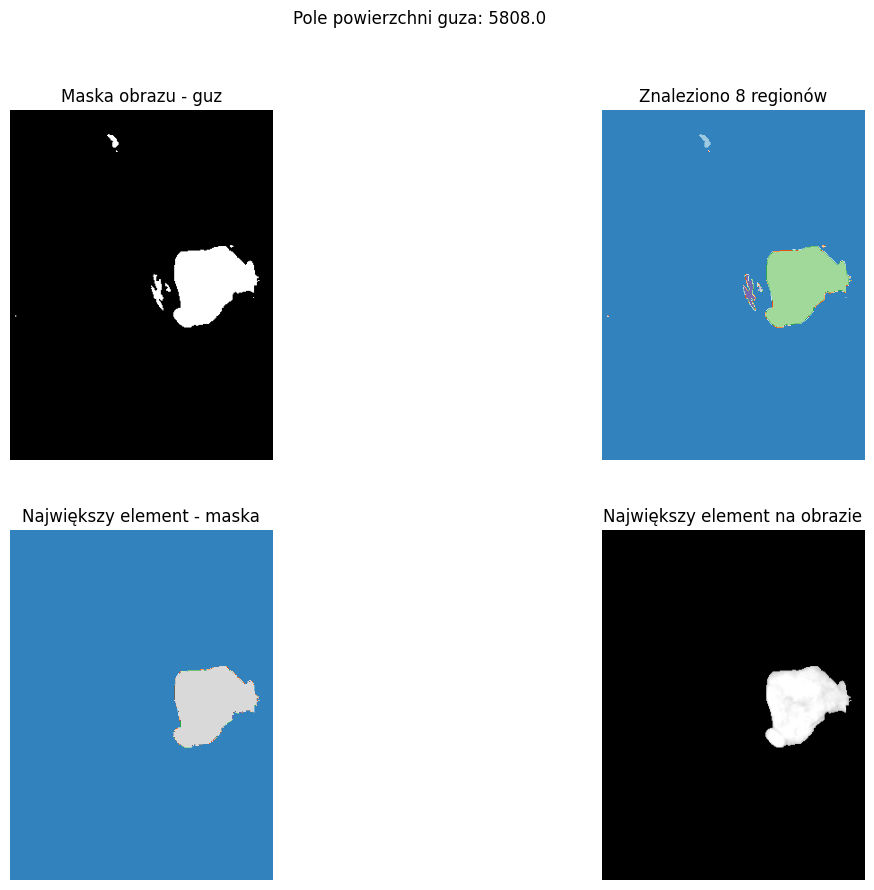

In [388]:
# _, axs = plt.subplots(4, 2, figsize=(12, 15))
# vs = np.linspace(145, 255, 8, dtype=np.uint8)
# aaa = axs.reshape((8, ))

# for i, v in enumerate(vs):
#     cast(plt_Axes, aaa[i]).imshow(brain_tumor > v, cmap="gray")
#     cast(plt_Axes, aaa[i]).axis(False)
#     cast(plt_Axes, aaa[i]).set_title(f"Threshold: {v}")

# plt.show()
tr_tumor = 191
brain_tumor_tum = brain_tumor > tr_tumor
labelz_tum, labelz_tum_cnt = ski.measure.label(brain_tumor_tum, return_num=True)
propz_tum = ski.measure.regionprops(labelz_tum)

max_tum = max(propz_tum, key=lambda a: a.area)
max_i_tum = max_tum.label
max_area_tum = max_tum.area

tumor_mask = (labelz_tum == max_i_tum)
tumor_only = np.zeros_like(brain_tumor, dtype=np.uint8)
tumor_only[tumor_mask] = brain_tumor[tumor_mask]

fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle(f"Pole powierzchni guza: {max_area_tum}")

cast(plt_Axes, axs[0, 0]).imshow(brain_tumor_tum, cmap="gray")
cast(plt_Axes, axs[0, 0]).set_title("Maska obrazu - guz")
cast(plt_Axes, axs[0, 0]).axis(False)

cast(plt_Axes, axs[0, 1]).imshow(labelz_tum, cmap="tab20c")
cast(plt_Axes, axs[0, 1]).set_title(f"Znaleziono {labelz_tum_cnt} regionów")
cast(plt_Axes, axs[0, 1]).axis(False)

cast(plt_Axes, axs[1, 0]).imshow(tumor_mask, cmap="tab20c")
cast(plt_Axes, axs[1, 0]).set_title("Największy element - maska")
cast(plt_Axes, axs[1, 0]).axis(False)

cast(plt_Axes, axs[1, 1]).imshow(tumor_only, cmap="gray")
cast(plt_Axes, axs[1, 1]).set_title("Największy element na obrazie")
cast(plt_Axes, axs[1, 1]).axis(False)

plt.show()

### Krok 5
Zaprezentuj złożenie obu obrazów. Oblicz, jaki procent całego mózgu jest
zajęte przez guz.

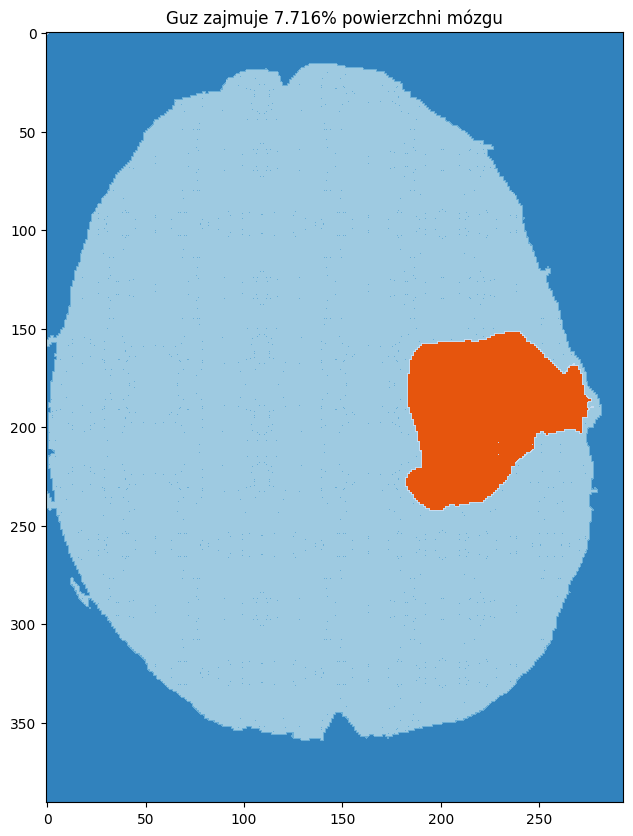

In [389]:
tumor_ptc = max_area_tum / max_area_br * 100
brain_and_tumor = np.uint8(brain_mask) * 2
brain_and_tumor[tumor_mask] = 4
brain_and_tumor[0, 0] = 20

_, ax = plt.subplots(1, 1, figsize=(10, 10))

cast(plt_Axes, ax).imshow(brain_and_tumor, cmap="tab20c")
cast(plt_Axes, ax).set_title(f"Guz zajmuje {tumor_ptc:5.3f}% powierzchni mózgu")

plt.show()

## Zadanie 2

## Krok 1
- Wczytaj obraz bolts.jpg
- Zmniejsz rozdzielczość obrazu. Poniższe etapy segmentacji będą działały
  tylko dla pewnego zakresu rozdzielczości.
- przekształć obraz do odcieni szarości
- usuń szumy filtrem Gaussa
- wykonaj filtrację Canny


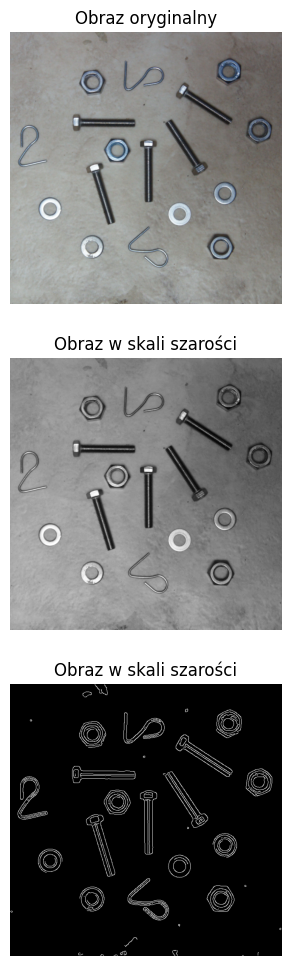

In [390]:
bolts = ski.io.imread("lab4/bolts.jpg")
resiz = np.array(bolts.shape, dtype=np.float32)
resiz[:2] *= 640 / max(bolts.shape)

bolts = ski.transform.resize(bolts, resiz)

_, axs = plt.subplots(3, 1, figsize=(4, 12))

cast(plt_Axes, axs[0]).imshow(bolts)
cast(plt_Axes, axs[0]).set_title("Obraz oryginalny")
cast(plt_Axes, axs[0]).axis(False)

bolts = rgb2gray(bolts)

cast(plt_Axes, axs[1]).imshow(bolts, cmap="gray")
cast(plt_Axes, axs[1]).set_title("Obraz w skali szarości")
cast(plt_Axes, axs[1]).axis(False)

bolts_edge = ski.feature.canny(bolts, 1.2)

cast(plt_Axes, axs[2]).imshow(bolts_edge, cmap="gray")
cast(plt_Axes, axs[2]).set_title("Obraz w skali szarości")
cast(plt_Axes, axs[2]).axis(False)

plt.show()

### Krok 2
Usuń artefakty pozostałe na brzegach obrazu (funkcja `clear_border`). Są to
fałszywie znalezione linie. Następnie korzystając z filtru morfologicznego 
`close` (odpowiedni wzór i wielkość maski!!) połącz linie obiektów. Może się 
okazać, że filtr `close` trzeba będzie zastosować dwukrotnie, z różnymi 
parametrami.

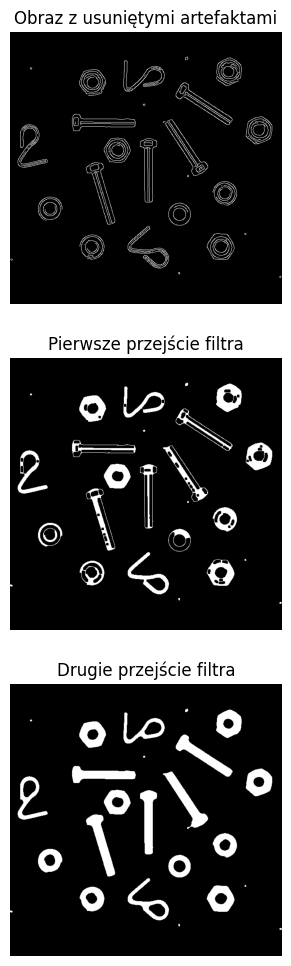

In [391]:
border_mask = np.ones_like(bolts, dtype=np.bool_)
border_mask[600:, :] = 0
border_mask[:50, :] = 0

bolts_edge_clear = ski.segmentation.clear_border(bolts_edge, mask=border_mask)

_, axs = plt.subplots(3, 1, figsize=(4, 12))

cast(plt_Axes, axs[0]).imshow(bolts_edge_clear, cmap="gray")
cast(plt_Axes, axs[0]).set_title("Obraz z usuniętymi artefaktami")
cast(plt_Axes, axs[0]).axis(False)

bolts_edge_closed = ski.morphology.binary_closing(
    bolts_edge_clear,
    ski.morphology.disk(3.4)
)

cast(plt_Axes, axs[1]).imshow(bolts_edge_closed, cmap="gray")
cast(plt_Axes, axs[1]).set_title("Pierwsze przejście filtra")
cast(plt_Axes, axs[1]).axis(False)

bolts_edge_closed = ski.morphology.binary_closing(
    bolts_edge_closed,
    ski.morphology.disk(7)
)

cast(plt_Axes, axs[2]).imshow(bolts_edge_closed, cmap="gray")
cast(plt_Axes, axs[2]).set_title("Drugie przejście filtra")
cast(plt_Axes, axs[2]).axis(False)

plt.show()

### Krok 3
Wykonaj segmentację obrazu i wyświetl

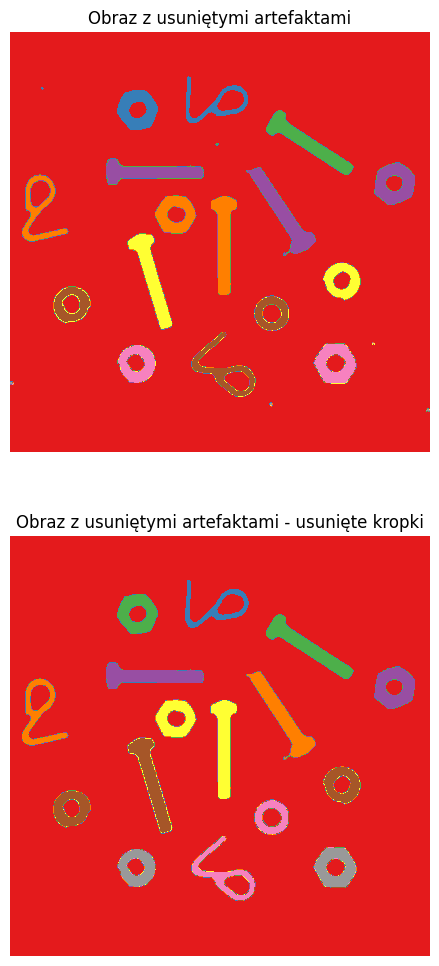

In [392]:
labelz_bolt = ski.measure.label(bolts_edge_closed)

_, axs = plt.subplots(2, 1, figsize=(6, 12))

cast(plt_Axes, axs[0]).imshow(labelz_bolt, cmap="Set1")
cast(plt_Axes, axs[0]).set_title("Obraz z usuniętymi artefaktami")
cast(plt_Axes, axs[0]).axis(False)

labelz_bolt = ski.morphology.remove_small_objects(labelz_bolt, 100)

cast(plt_Axes, axs[1]).imshow(labelz_bolt, cmap="Set1")
cast(plt_Axes, axs[1]).set_title("Obraz z usuniętymi artefaktami - usunięte kropki")
cast(plt_Axes, axs[1]).axis(False)

plt.show()

## Zadanie 3 Określanie parametrów obiektów

### Podpunkt a
Na obrazie coins są dwa rodzaje monet (różnią się średnicą). Wskaż
automatycznie, które monety należą do pierwszej, a które do drugiej grupy

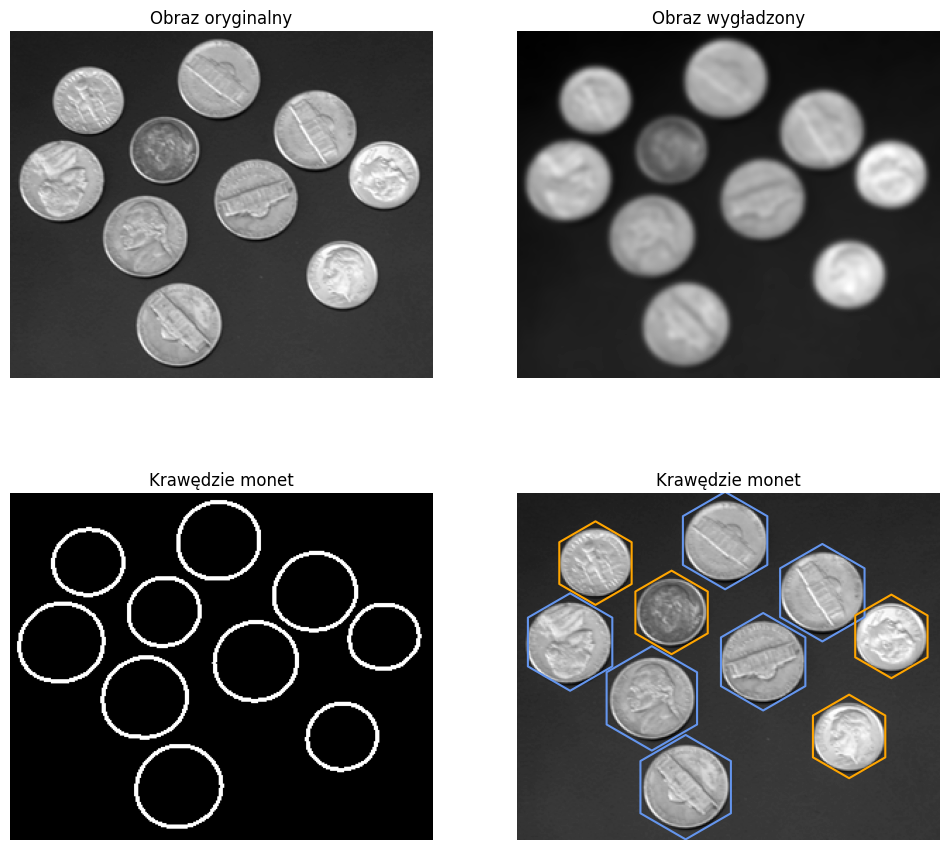

In [393]:
coins = ski.io.imread("lab4/coins.png")

_, axs = plt.subplots(2, 2, figsize=(12, 11))

cast(plt_Axes, axs[0, 0]).imshow(coins, cmap="gray")
cast(plt_Axes, axs[0, 0]).set_title("Obraz oryginalny")
cast(plt_Axes, axs[0, 0]).axis(False)

coins_smooth = ski.filters.gaussian(coins, sigma=2)

cast(plt_Axes, axs[0, 1]).imshow(coins_smooth, cmap="gray")
cast(plt_Axes, axs[0, 1]).set_title("Obraz wygładzony")
cast(plt_Axes, axs[0, 1]).axis(False)

coins_edge = ski.feature.canny(coins_smooth, sigma=2)
coins_edge = ski.morphology.dilation(coins_edge)
coins_edge = ski.morphology.remove_small_objects(coins_edge, 100)

cast(plt_Axes, axs[1, 0]).imshow(coins_edge, cmap="gray")
cast(plt_Axes, axs[1, 0]).set_title("Krawędzie monet")
cast(plt_Axes, axs[1, 0]).axis(False)


cast(plt_Axes, axs[1, 1]).imshow(coins, cmap="gray")
cast(plt_Axes, axs[1, 1]).set_title("Krawędzie monet")
cast(plt_Axes, axs[1, 1]).axis(False)

_, cnt = ski.measure.label(coins_edge, return_num= True)

hough_radii = np.arange(10, 60, 2)
hough_spaces = ski.transform.hough_circle(coins_edge, hough_radii)

_, cx, cy, radii = ski.transform.hough_circle_peaks(
    hough_spaces,
    hough_radii,
    total_num_peaks= cnt
)

# Klasteryzacja przybliżonych promieni
kmeans_aprox_radii = sklearn.cluster.KMeans(2) \
    .fit(radii.reshape(-1, 1))
kmeans_labels = kmeans_aprox_radii.labels_

size = radii * radii * 6.2832

cast(plt_Axes, axs[1, 1]).scatter(
    cx, cy, size, 
    c= np.where(kmeans_labels, "orange", "cornflowerblue"), 
    marker= plt_Marker("h", fillstyle="none"), 
)

plt.show()

### Podpunkt b
Na obrazie planes znajdź automatycznie i zaznacz obiekty będące samolotami


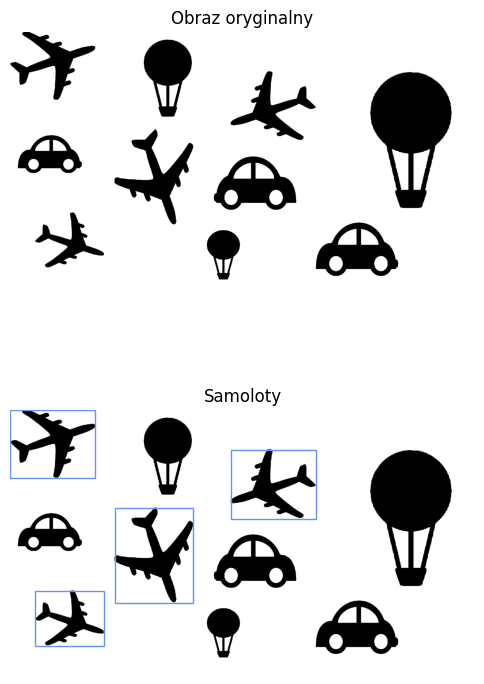

In [394]:
planes = ski.io.imread("lab4/planes.png")[:, :, 1]

_, axs = plt.subplots(2, 1, figsize=(6, 9))

cast(plt_Axes, axs[0]).imshow(planes, cmap="gray")
cast(plt_Axes, axs[0]).set_title("Obraz oryginalny")
cast(plt_Axes, axs[0]).axis(False)

cast(plt_Axes, axs[1]).imshow(planes, cmap="gray")
cast(plt_Axes, axs[1]).set_title("Samoloty")
cast(plt_Axes, axs[1]).axis(False)

planes_neg = np.max(planes) - planes

labelz_planes = ski.measure.label(planes_neg)
propz_planes = ski.measure.regionprops(labelz_planes)

propz_planes = list(filter(lambda p: p.euler_number == 1, propz_planes))

for prop in propz_planes:
    y, x, max_y, max_x = prop.bbox
    h, w = max_y - y, max_x - x
    cast(plt_Axes, axs[1]).add_patch(plt_Rectangle(
        (x, y), w, h,
        fill= False,
        edgecolor= "cornflowerblue"
    ))

plt.show()